In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Schools
For a lot of parents, they will choose their future homes based on the school quality in the area. They think that a better public school will help their children live better lives. In this section, we analyze what neighborhoods have the best schools.
<p align= "center" >
<img src="https://upload.wikimedia.org/wikipedia/commons/4/40/Children_at_school_%288720604364%29.jpg" width="1000" height="600">
</p>
https://upload.wikimedia.org/wikipedia/commons/4/40/Children_at_school_%288720604364%29.jpg

In [5]:
schools_df = pd.read_csv('schools.csv')

pop_df = pd.read_csv('pop.csv')

schools_df['Neighborhood'] = schools_df[['neighborhood']]

schools_df = schools_df[['Neighborhood', 'total_students_enrolled']]
pop_df = pop_df[['Neighborhood', '2020_Total_Population']]

df = pd.merge(schools_df, pop_df, on='Neighborhood')

df['percent_students_per_capita'] = df['total_students_enrolled'] / df['2020_Total_Population']*100

df = df[['Neighborhood', 'percent_students_per_capita']].sort_values(by='percent_students_per_capita', ascending=False)

display(df)

,Neighborhood,percent_students_per_capita
49,Northview Heights,29.790842
34,Homewood North,22.506687
35,Homewood South,21.106195
22,East Hills,19.674965
36,Homewood West,18.380062
...,...,...
76,West Oakland,2.012628
62,South Side Flats,1.459756
59,Shadyside,1.416727
8,Bluff,0.680041


Text(0.5, 1.0, 'Percent of Students per Capita by Neighborhood')

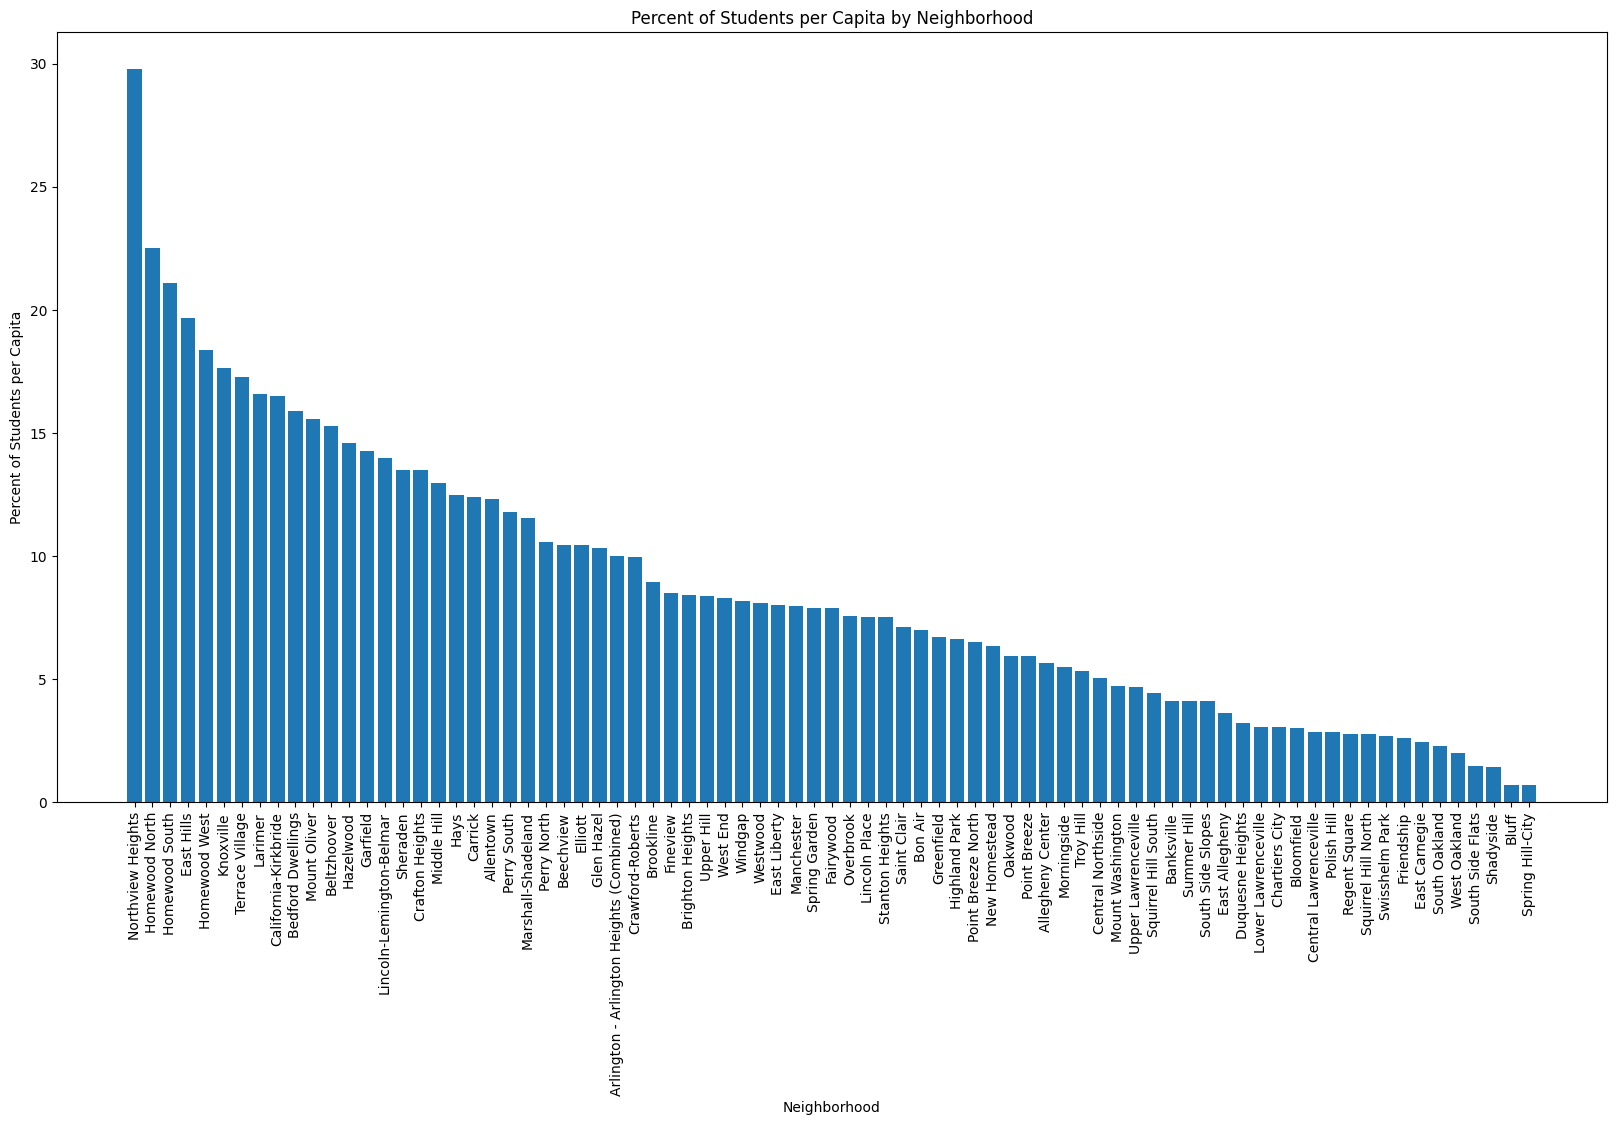

In [6]:
plt.figure(figsize=(20,10))
plt.bar(df['Neighborhood'], df['percent_students_per_capita'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Percent of Students per Capita')
plt.title('Percent of Students per Capita by Neighborhood')

#### Northview Heights seems to be an outlier, so we drop it from the dataset.

In [7]:
df = df.drop(df[df['Neighborhood'] == 'Northview Heights'].index)

### In this submetric, it's assumed that neighborhoods with more student enrollment per capita are more desirable since, it correlates with more families with children living in the neighborhood and a higher level of education in the neighborhood.

,Neighborhood,Score
65,Squirrel Hill North,2134.166510
57,Regent Square,2125.814536
54,Point Breeze,2113.092057
58,Shadyside,2090.963288
55,Point Breeze North,2065.472088
...,...,...
37,Knoxville,1658.393866
4,Bedford Dwellings,1631.621622
49,Northview Heights,1619.516129
63,Spring Garden,1584.908537


Text(0.5, 1.0, 'Education Score by Neighborhood')

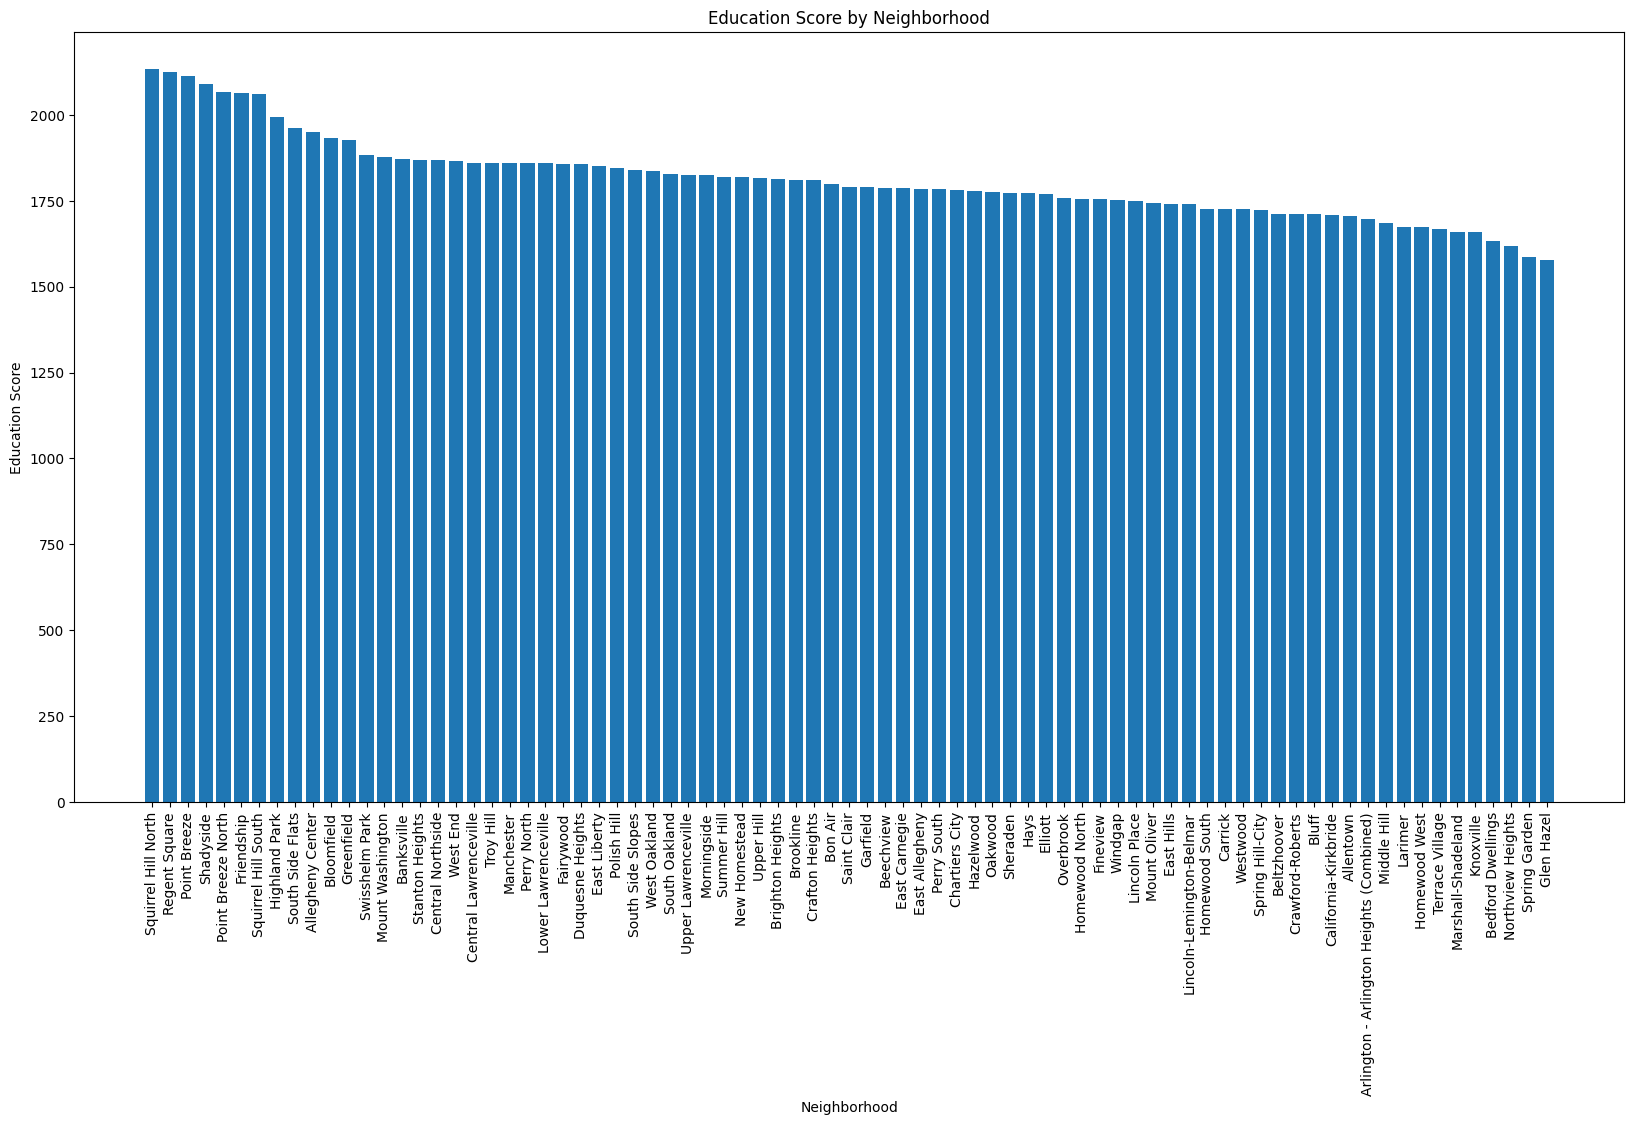

In [8]:
edu_df = pd.read_csv('education_attainment.csv')

columns = ["Estimate; Total: - No schooling completed", "Estimate; Total: - Nursery school", "Estimate; Total: - Kindergarten", "Estimate; Total: - 1st grade", "Estimate; Total: - 2nd grade", "Estimate; Total: - 3rd grade", "Estimate; Total: - 4th grade", "Estimate; Total: - 5th grade", "Estimate; Total: - 6th grade", "Estimate; Total: - 7th grade", "Estimate; Total: - 8th grade", "Estimate; Total: - 9th grade", "Estimate; Total: - 10th grade", "Estimate; Total: - 11th grade", "Estimate; Total: - 12th grade, no diploma", "Estimate; Total: - Regular high school diploma", "Estimate; Total: - GED or alternative credential", "Estimate; Total: - Some college, less than 1 year", "Estimate; Total: - Some college, 1 or more years, no degree", "Estimate; Total: - Associate's degree", "Estimate; Total: - Bachelor's degree", "Estimate; Total: - Master's degree", "Estimate; Total: - Professional school degree", "Estimate; Total: - Doctorate degree"]
edu_df = edu_df[["Neighborhood"] + columns]

total = edu_df[columns].sum(axis=1)

for column in columns:
    edu_df[column] = (edu_df[column] / total) * 100


for i, column in enumerate(columns):
    edu_df[column] = edu_df[column] * (i + 1)

edu_df['Score'] = edu_df[columns].sum(axis=1)
edu_df = edu_df[['Neighborhood', 'Score']].sort_values(by='Score', ascending=False)

display(edu_df)

plt.figure(figsize=(20,10))
plt.bar(edu_df['Neighborhood'], edu_df['Score'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Education Score')
plt.title('Education Score by Neighborhood')


,Neighborhood,Overall_score
49,Point Breeze,5.213990
46,Point Breeze North,5.127372
68,Squirrel Hill North,5.122682
0,Homewood North,5.113430
67,Regent Square,5.103980
...,...,...
71,East Carnegie,4.292746
25,Glen Hazel,4.156016
77,Spring Hill-City,4.066899
37,Spring Garden,4.063655


Text(0.5, 1.0, 'Overall Score by Neighborhood')

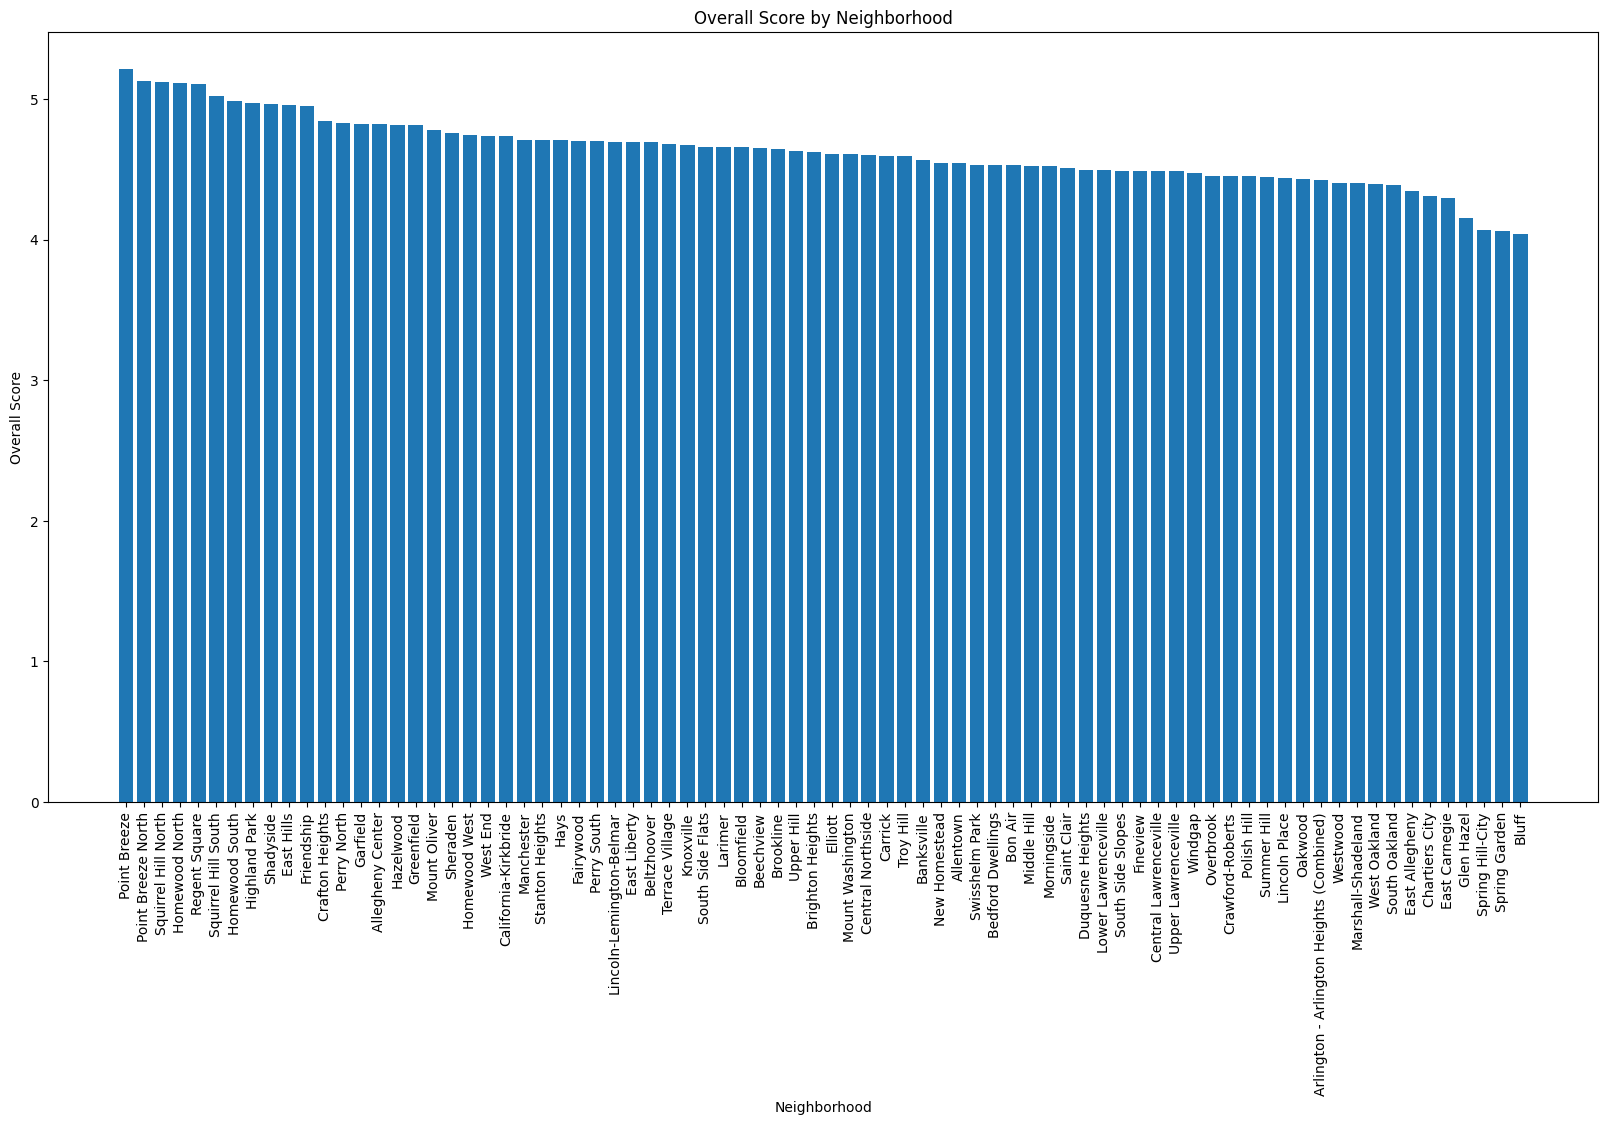

In [10]:
combined_df = pd.merge(df, edu_df, on='Neighborhood')

combined_df['Overall_score'] = (combined_df['percent_students_per_capita']/combined_df['percent_students_per_capita'].max()) + 5*(combined_df['Score']/combined_df['Score'].max())

combined_df = combined_df[['Neighborhood', 'Overall_score']].sort_values(by='Overall_score', ascending=False)

combined_df.to_csv('../export_schools.csv')

display(combined_df)

plt.figure(figsize=(20,10))
plt.bar(combined_df['Neighborhood'], combined_df['Overall_score'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Overall Score')
plt.title('Overall Score by Neighborhood')


## Results

In terms of education level and student enrollment, the top 5 neighborhoods are:
1. Point Breeze
2. Point Breeze North
3. Squirrel Hill North
4. Homewood North
5. Regent Square

Point Breeze High School
<p align= "center" >
<img src="https://imagescdn.homes.com/i2/5mEAvA-TPZjr8jBMoXCz8pIbDz5rkfYjxsl87CV6PEg/111/point-breeze-north-pittsburgh-pa-22.jpg?p=1" width="1000" height="600">
</p>
https://imagescdn.homes.com/i2/5mEAvA-TPZjr8jBMoXCz8pIbDz5rkfYjxsl87CV6PEg/111/point-breeze-north-pittsburgh-pa-22.jpg?p=1